In [2]:
## import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
from subprocess import check_output
pd.set_option('display.max_columns', None)
import configparser
import os
import requests
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import sparse, stats, spatial
import scipy.sparse.linalg
from scipy.sparse import csgraph
from sklearn import preprocessing, decomposition
import librosa
import IPython.display as ipd

plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
%matplotlib inline

In [3]:
stack = pd.read_csv("data/survey_results_public.csv")
stack.head(1)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

# Select dataframe to work on

- feature columns
- not null rows (salary, satisfaction)
- create new feature columns: languages, mean(satisfaction)



In [4]:
print(dict(stack.dtypes).items())

dict_items([('YearsCodedJob', dtype('O')), ('ProgramHobby', dtype('O')), ('ShipIt', dtype('O')), ('SelfTaughtTypes', dtype('O')), ('VersionControl', dtype('O')), ('IDE', dtype('O')), ('AssessJobDiversity', dtype('O')), ('Country', dtype('O')), ('AuditoryEnvironment', dtype('O')), ('ChangeWorld', dtype('O')), ('PronounceGIF', dtype('O')), ('CousinEducation', dtype('O')), ('AssessJobDept', dtype('O')), ('StackOverflowJobSearch', dtype('O')), ('ImportantBenefits', dtype('O')), ('SurveyLong', dtype('O')), ('AssessJobLeaders', dtype('O')), ('InfluenceConsultants', dtype('O')), ('Professional', dtype('O')), ('EducationTypes', dtype('O')), ('StackOverflowHelpful', dtype('O')), ('RightWrongWay', dtype('O')), ('CompanySize', dtype('O')), ('HighestEducationParents', dtype('O')), ('EducationImportant', dtype('O')), ('DiversityImportant', dtype('O')), ('WantWorkFramework', dtype('O')), ('MajorUndergrad', dtype('O')), ('FormalEducation', dtype('O')), ('StackOverflowAdsDistracting', dtype('O')), ('H

In [5]:
float_types = ["StackOverflowSatisfaction", "JobSatisfaction", "Salary", "CareerSatisfaction", "ExpectedSalary"]

In [6]:
data = stack.drop(float_types, axis=1)
data.head(1)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,Desktop; iOS app,At least once each week,Haven't done at all,Once or twice,Haven't done at all,Haven't done at all,Seve

In [7]:
y = stack[float_types]
y.head(1)

,StackOverflowSatisfaction,JobSatisfaction,Salary,CareerSatisfaction,ExpectedSalary
0,9.0,NaN,NaN,NaN,NaN


## choose columns

In [8]:
target_cols = list(stack.columns[1:10])+["HaveWorkedLanguage"]
data = data[target_cols]

## Explode "HaveWorkedLanguage" feature

new column per language

In [9]:
languages = list(set([lang for sublist in [str(langs).replace(" ", "").split(";") for langs in stack['HaveWorkedLanguage']] for lang in sublist]))

In [10]:
print(languages)

['Haskell', 'Objective-C', 'Erlang', 'SQL', 'R', 'Go', 'Smalltalk', 'Dart', 'C++', 'Rust', 'C#', 'PHP', 'Perl', 'Julia', 'Python', 'Groovy', 'Assembly', 'Scala', 'Lua', 'JavaScript', 'Swift', 'Matlab', 'TypeScript', 'Clojure', 'CommonLisp', 'F#', 'Java', 'VBA', 'Hack', 'nan', 'VB.NET', 'CoffeeScript', 'VisualBasic6', 'C', 'Ruby', 'Elixir']


In [11]:
def to_array(row):
    l = str(row).replace(" ", "").split(";")
    if len(l)==1 and "nan" in l:
        return []
    else:
        return l
    
def create_language_cols(row, languages):
    cols = dict()
    for language in list(set(languages)):
        cols[language] = 1 if language in row["HaveWorkedLanguage"] else 0
    return pd.Series(cols)

In [12]:
data["HaveWorkedLanguage"] = data.HaveWorkedLanguage.apply(to_array)

In [13]:
data[languages] = data.apply(lambda row: create_language_cols(row, languages), axis=1)

In [14]:
data.head(1)

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,HaveWorkedLanguage,Haskell,Objective-C,Erlang,SQL,R,Go,Smalltalk,Dart,C++,Rust,C#,PHP,Perl,Julia,Python,Groovy,Assembly,Scala,Lua,JavaScript,Swift,Matlab,TypeScript,Clojure,CommonLisp,F#,Java,VBA,Hack,nan,VB.NET,CoffeeScript,VisualBasic6,C,Ruby,Elixir
0,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,[Swift],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [15]:
data = data.drop(["HaveWorkedLanguage", "nan"], axis=1)

## Avg satisfaction

In [16]:
def average_satisfaction(row):
    if np.isnan(row["JobSatisfaction"]):
        return row["CareerSatisfaction"]
    if np.isnan(row["CareerSatisfaction"]):
        return row["JobSatisfaction"]
    else:
        return (row["JobSatisfaction"]+row["CareerSatisfaction"])/2

In [17]:
y["AvgSatisfaction"] = y.apply(average_satisfaction, axis=1)

/home/hparmantier/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



## check nan values 

In [18]:
print(len(data))

51392


In [19]:
print(len(y[y.Salary.isnull()]))
print(len(y[(y.JobSatisfaction.isnull())&(y.CareerSatisfaction.isnull())]))
print(len(y[(y.Salary.isnull())&(y.ExpectedSalary.isnull())]))

38501
8673
35935


In [20]:
print(len(y[y.AvgSatisfaction.isnull()]))

8673


# Vectorize

## Salary nan removal (TODO: manage properly)

In [21]:
y_salary = y[~y.Salary.isnull()]
print(len(y_salary))

12891


In [22]:
y_salary.index

Int64Index([    2,    14,    17,    18,    22,    25,    34,    36,    37,
               52,
            ...
            51343, 51355, 51356, 51360, 51361, 51371, 51378, 51382, 51387,
            51390],
           dtype='int64', length=12891)

In [23]:
data_salary = data.loc[y_salary.index]
print(len(data_salary))

12891


In [24]:
X_salary = pd.get_dummies(data_salary)
X_salary.head(1)

,Haskell,Objective-C,Erlang,SQL,R,Go,Smalltalk,Dart,C++,Rust,C#,PHP,Perl,Julia,Python,Groovy,Assembly,Scala,Lua,JavaScript,Swift,Matlab,TypeScript,Clojure,CommonLisp,F#,Java,VBA,Hack,VB.NET,CoffeeScript,VisualBasic6,C,Ruby,Elixir,Professional_Professional developer,ProgramHobby_No,"ProgramHobby_Yes, I contribute to open source projects","ProgramHobby_Yes, I program as a hobby","ProgramHobby_Yes, both",Country_Afghanistan,Country_Albania,Country_Anguilla,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaidjan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Bermuda,Country_Bolivia,Country_Bosnia-Herzegovina,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Cambodia,Country_Canada,Country_Cayman Islands,Country_Chile,Country_China,Country_Colombia,Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czech Republic,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Estonia,Country_Finland,Country_France,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Guam,Country_Guatemala,Country_Guinea,Country_Honduras,Country_Hong Kong,Country_Hungary,Country_I prefer not to say,Country_Iceland,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kuwait,Country_Kyrgyzstan,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Liechtenstein,Country_Lithuania,Country_Luxembourg,Country_Macedonia,Country_Madagascar,Country_Malaysia,Country_Malta,Country_Martinique (French),Country_Mauritius,Country_Mexico,Country_Moldavia,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Nepal,Country_Netherlands,Country_New Caledonia (French),Country_New Zealand,Country_Nicaragua,Country_Nigeria,Country_North Korea,Country_Norway,Country_Pakistan,Country_Panama,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Puerto Rico,Country_Qatar,Country_Reunion (French),Country_Romania,Country_Russian Federation,Country_Saudi Arabia,Country_Serbia,Country_Seychelles,Country_Singapore,Country_Slovak Republic,Country_Slovenia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Syria,Country_Taiwan,Country_Tanzania,Country_Thailand,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_U.S. Minor Outlying Islands,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Virgin Islands (USA),Country_Yemen,Country_Zaire,Country_Zimbabwe,University_I prefer not to say,University_No,"University_Yes, full-time","University_Yes, part-time",EmploymentStatus_Employed full-time,EmploymentStatus_Employed part-time,FormalEducation_Bachelor's degree,FormalEducation_Doctoral degree,FormalEducation_I never completed any formal education,FormalEducation_I prefer not to answer,FormalEducation_Master's degree,FormalEducation_Primary/elementary school,FormalEducation_Professional degree,FormalEducation_Secondary school,FormalEducation_Some college/university study without earning a bachelor's degree,MajorUndergrad_A business discipline,MajorUndergrad_A health science,MajorUndergrad_A humanities discipline,MajorUndergrad_A natural science,MajorUndergrad_A non-computer-focused engineering discipline,MajorUndergrad_A social science,MajorUndergrad_Computer engineering or electrical/electronics engineering,MajorUndergrad_Computer programming or Web development,MajorUndergrad_Computer science or software engineering,MajorUndergrad_Fine arts or performing arts,MajorUndergrad_I never declared a major,"MajorUndergrad_Information technology, networking, or system administration",MajorUndergrad_Management information sy

## Satisfaction

In [25]:
y_satisf = y[~y.AvgSatisfaction.isnull()]
print(len(y_satisf))

42719


In [26]:
data_satisf = data.loc[y_satisf.index]
print(len(data_satisf))

42719


In [27]:
X_satisf = pd.get_dummies(data_satisf)
X_satisf.head(1)

,Haskell,Objective-C,Erlang,SQL,R,Go,Smalltalk,Dart,C++,Rust,C#,PHP,Perl,Julia,Python,Groovy,Assembly,Scala,Lua,JavaScript,Swift,Matlab,TypeScript,Clojure,CommonLisp,F#,Java,VBA,Hack,VB.NET,CoffeeScript,VisualBasic6,C,Ruby,Elixir,Professional_None of these,Professional_Professional developer,Professional_Professional non-developer who sometimes writes code,Professional_Student,Professional_Used to be a professional developer,ProgramHobby_No,"ProgramHobby_Yes, I contribute to open source projects","ProgramHobby_Yes, I program as a hobby","ProgramHobby_Yes, both",Country_Afghanistan,Country_Aland Islands,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,Country_Anguilla,Country_Antarctica,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,Country_Austria,Country_Azerbaidjan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bermuda,Country_Bhutan,Country_Bolivia,Country_Bosnia-Herzegovina,Country_Botswana,Country_Bouvet Island,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Cape Verde,Country_Cayman Islands,Country_Chile,Country_China,Country_Colombia,Country_Comoros,Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czech Republic,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Eritrea,Country_Estonia,Country_Ethiopia,Country_Falkland Islands,Country_Fiji,Country_Finland,Country_France,Country_French Guyana,Country_Gabon,Country_Georgia,Country_Germany,Country_Ghana,Country_Gibraltar,Country_Greece,Country_Guam,Country_Guatemala,Country_Guinea,Country_Guyana,Country_Haiti,Country_Heard and McDonald Islands,Country_Honduras,Country_Hong Kong,Country_Hungary,Country_I prefer not to say,Country_Iceland,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Ivory Coast (Cote D'Ivoire),Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kuwait,Country_Kyrgyzstan,Country_Laos,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Libya,Country_Liechtenstein,Country_Lithuania,Country_Luxembourg,Country_Macau,Country_Macedonia,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Mali,Country_Malta,Country_Martinique (French),Country_Mauritius,Country_Mexico,Country_Moldavia,Country_Monaco,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Namibia,Country_Nepal,Country_Netherlands,Country_Netherlands Antilles,Country_New Caledonia (French),Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_North Korea,Country_Northern Mariana Islands,Country_Norway,Country_Oman,Country_Pakistan,Country_Panama,Country_Paraguay,Country_Peru,Country_Philippines,Country_Pitcairn Island,Country_Poland,Country_Polynesia (French),Country_Portugal,Country_Puerto Rico,Country_Qatar,Country_Reunion (French),Country_Romania,Country_Russian Federation,Country_Rwanda,Country_S. Georgia & S. Sandwich Isls.,Country_Saint Lucia,Country_Saint Vincent & Grenadines,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Singapore,Country_Slovak Republic,Country_Slovenia,Country_Somalia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syria,Country_Tadjikistan,Country_Taiwan,Country_Tanzania,Country_Thailand,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_U.S. Minor Outlying Islands,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Virgin Islands (British),Country_Virgin Is

# PCA + coloring

In [28]:
def pca(X, n_components):
    ...

## Salary

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=2)
pca.fit(X_salary)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
print(pca.explained_variance_ratio_)

[ 0.05715436  0.05610772]


In [32]:
X_2 = pca.transform(X_salary)

In [33]:
df = pd.DataFrame(list(dict(X_2).items()))

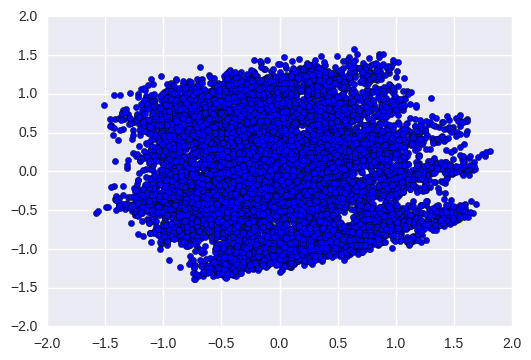

In [34]:
plt.scatter(df[0], df[1])

In [9]:
from matplotlib import cm
from matplotlib.colors import Normalize

In [10]:
cmap = plt.get_cmap('Reds')
colors = cmap(Normalize(list(y_salary["Salary"])))
plt.scatter(df[0], df[1],c=colors)

NameError: name 'y_salary' is not defined

## Avg Satisfaction

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca_satisf = PCA(n_components=2)
pca_satisf.fit(X_satisf)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [39]:
print(pca_satisf.explained_variance_ratio_)

[ 0.06655289  0.05401192]


In [40]:
X_satisf_2 = pca_satisf.transform(X_satisf)

In [41]:
df_satisf = pd.DataFrame(list(dict(X_satisf_2).items()))

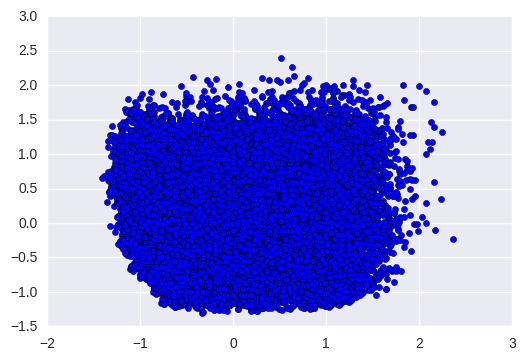

In [42]:
plt.scatter(df_satisf[0], df_satisf[1])

In [ ]:
sat = (y_satisf["AvgSatisfaction"]-y_satisf["AvgSatisfaction"].mean())/y_satisf["AvgSatisfaction"].std()
cmap = plt.get_cmap('Reds')
colors = cmap(list(sat))
plt.scatter(df_satisf[0], df_satisf[1],c=colors)

# Similarity graph

In [18]:
X.shape

(51392, 310)

In [17]:
X_sim = spatial.distance.pdist(X.as_matrix(), metric="cosine")

MemoryError: 